### Diana Michell Hernández Trejo

#### Con base en la presentación Problemas de Calibración:

1. Escriba una función que cree la matriz del sistema presentado en la página 6.
2. Realice el ejercicio que se describe en la página 9.

## Problemas de Calibración

Ejercicio página 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Ta= 1.0
Tb= 1.0
L= 1.0
k= 1.0
S= 0.0
N= 21

In [3]:
#CONSTRUYENDO LA MATRIZ

def buildMatrix(N, d):
    M= np.zeros((N, N))
    
    for i in range (0, N-1):
        M[i+1, i]= -1
        M[i, i+1]= -1
        
    for i in range(0, N):
        M[i, i]= 2-d
        
    return M

In [4]:
def conduccion_1d(k ,S ,L ,Ta, Tb, N, w):
    """ 
  Parameters
  ----------
  L: float
  L es la longitud del dominio.
  
  K: float
  Es la conductividad del material.
  
  S: float
  Es la fuente.
  
  Ta: float
  Es la condición frontera a la izquierda.
  
  Tb: float
  Es la condición frontera de la derecha.
  
  N: int
  Es el número de nodos internos (grados de libertad).
  
  w: float
  Es una constante.
  
  Return
  ------
  Al final esta función dibuja la solución.
    """ 
    h= L/(N+1)
    r = k/h**2
    
    d= (w**2)/r

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = buildMatrix(N,d)

    
    b[:] = S/r
    b[0] += Ta
    b[-1] += Tb
    
    T[0] = Ta
    T[-1] = Tb

    T[1:N+1] = np.linalg.solve(A,b)

    x= [h * i for i in range(1, N+1)]
    x.insert(0,0)
    x.append(L)


    

    print(T)
    plt.plot(x, T, '-o', color='purple')
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.show

[ 1.          1.30272968  1.43942855  1.39267454  1.16842639  0.79526416
  0.32074678 -0.19464927 -0.68523757 -1.08849344 -1.35302256 -1.44511112
 -1.35302256 -1.08849344 -0.68523757 -0.19464927  0.32074678  0.79526416
  1.16842639  1.39267454  1.43942855  1.30272968  1.        ]


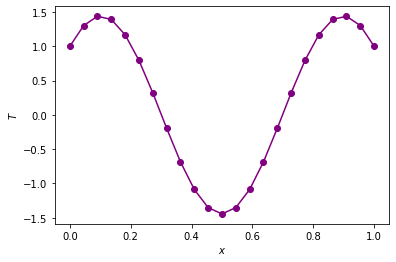

In [5]:
w= 2.5*np.pi

conduccion_1d(k, S, L, Ta, Tb, N, w)

Ejercicio página 9

In [6]:
def solExact (x , w ):
    x= np.array(x)
    return ((1.0 - np . cos ( w ))/ np . sin (w )) * np . sin (w * x) + np . cos (w * x )

In [7]:
def conduccion_1d_solExact(k ,S ,L ,Ta, Tb, N, w):
    """ 
  Parameters
  ----------
  L: float
  L es la longitud del dominio.
  
  K: float
  Es la conductividad del material.
  
  S: float
  Es la fuente.
  
  Ta: float
  Es la condición frontera a la izquierda.
  
  Tb: float
  Es la condición frontera de la derecha.
  
  N: int
  Es el número de nodos internos (grados de libertad).
  
  w: float
  Es una constante.
  
  Return
  ------
  Al final esta función dibuja la solución.
    """ 
    h= L/(N+1)
    r = k/h**2
    
    d= (w**2)/r

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = buildMatrix(N,d)

    
    b[:] = S/r
    b[0] += Ta
    b[-1] += Tb
    
    T[0] = Ta
    T[-1] = Tb

    T[1:N+1] = np.linalg.solve(A,b)

    x= [h * i for i in range(1, N+1)]
    x.insert(0,0)
    x.append(L)
    
    Error= np.linalg.norm(solExact(x, w)-T, 2) # Norma L -2 del error absoluto


    #plt.title('Ecuación: $\frac{\partial^2u(x)}{\partial x^2}$ = $\omega^2$u(x); u(a)=u(b)=1')
    plt.plot(x, solExact(x,w), color="red", label= 'Sol.Analítica' )
    plt.plot(x, T, '-o', color="green", linestyle= 'None', label= 'Sol.Numerica')
    plt.legend(loc= 'best', bbox_to_anchor=(1.1, 0.9))
   
    plt.xlabel("$x$")
    plt.ylabel("$T$")
    plt.show

/tmp/ipykernel_3687495/1254007353.py:58: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x, T, '-o', color="green", linestyle= 'None', label= 'Sol.Numerica')


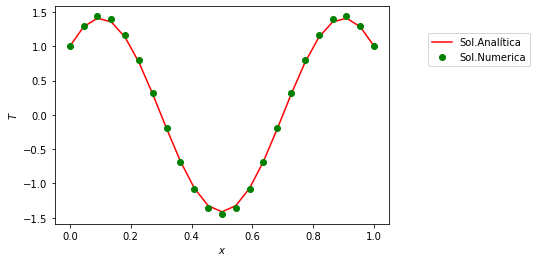

In [8]:
conduccion_1d_solExact(k ,S ,L ,Ta, Tb, N, w)